<a href="https://colab.research.google.com/github/valerian720/translate_color_spaces/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. задать изображение в цветовом пространстве LAB
2. конвертировать изображение

  2.1. в LCH

  2.2. в RGB

3. из пространства RGB преобразовать

  3.1. в HSB

  3.2. в HSV

  3.3. в HSI

4. вывести полученные цветовые пространства в виде нескольких матриц, по 1 матрице для каждого канала в greyscale (ака сделать кучу серых картинок для каждого цветового пространства для каждого канала)

5. преобразовать все ранне полученные цветовые пространства обратно в LAB

6. подсчитать delta E, delta E 94, delta E 2000.

7. оценить цветовые различия (то, насколько сильно меняется определенный цвет при перегоне его из одного пространства в другое)


http://www.brucelindbloom.com/index.html?Math.html

(?)

In [ ]:
#from skimage import color
# библиотека для работы с изображениями
# https://scikit-image.org/

In [ ]:
!pip install colormath

  Created wheel for colormath: filename=colormath-3.0.0-cp37-none-any.whl size=39391 sha256=6a836e6bcf86ae3e37c70f47f6139df9a182ae3f78d47b431346e7727fb7d1cf
  Stored in directory: /root/.cache/pip/wheels/20/49/7b/9635bccd6136cc713f623caa85ced89c0c63878f8b2a58fe99
Successfully built colormath


In [ ]:
from colormath.color_objects import *
from colormath.color_conversions import convert_color
# https://python-colormath.readthedocs.io/en/latest/conversions.html
# бибилиотека для конвертаций из одного цвеового пространства в другое

In [ ]:
def copy_pic(maybe_pic):
  return [[maybe_pic_pixel.copy() for maybe_pic_pixel in maybe_pic_row] for maybe_pic_row in maybe_pic] # bruh

In [ ]:
def change_pic(pic, converter_func):
  tmp = copy_pic(pic)
  for i in range(len(pic)):
    for j in range(len(pic[i])):
      tmp[i][j] = converter_func(pic[i][j])
  return tmp

In [ ]:
# по пиксельные конверторы

In [ ]:
lab_obj = LabColor(0,0,0)
# LAB to LCH
def converter_lab2lch(pixel):
  # pizdec
  lab_obj.lab_l = pixel[0]
  lab_obj.lab_a = pixel[1]
  lab_obj.lab_b = pixel[2]

  tmp_lch = convert_color(lab_obj, LCHabColor)
  return [round(tmp_lch.lch_l,2),round(tmp_lch.lch_c,2),round(tmp_lch.lch_h,2) ]

test_lch = converter_lab2lch([88, -86, 83])
print(test_lch)

lch_obj = LCHabColor(0,0,0)
# LCH to LAB
def converter_lch2lab(pixel):
  # pizdec
  lch_obj.lch_l = pixel[0]
  lch_obj.lch_c = pixel[1]
  lch_obj.lch_h = pixel[2]

  tmp_lab = convert_color(lab_obj, LabColor)
  return [round(tmp_lab.lab_l,2),round(tmp_lab.lab_a,2),round(tmp_lab.lab_b,2) ]
print(converter_lch2lab(test_lch))

[88.0, 119.52, 136.02]
[88, -86, 83]


In [ ]:
# LAB to RGB
def converter_lab2rgb(pixel):
  # pizdec
  lab_obj.lab_l = pixel[0]
  lab_obj.lab_a = pixel[1]
  lab_obj.lab_b = pixel[2]

  tmp_rgb = convert_color(lab_obj, sRGBColor)
  tmp_ret = tmp_rgb.get_upscaled_value_tuple()
  return [tmp_ret[0],tmp_ret[1],tmp_ret[2]]

test_rgb = converter_lab2rgb([88, -86, 83])
print(test_rgb)

rgb_obj = sRGBColor(0,0,0)
# RGB to LAB
def converter_rgb2lab(pixel):
  # pizdec
  rgb_obj.rgb_r = pixel[0]/255
  rgb_obj.rgb_g = pixel[1]/255
  rgb_obj.rgb_b = pixel[2]/255

  tmp_lab = convert_color(rgb_obj, LabColor)
  return [round(tmp_lab.lab_l,2),round(tmp_lab.lab_a,2),round(tmp_lab.lab_b,2) ]
print(converter_rgb2lab(test_rgb))


[0, 258, 0]
[88.66, -86.95, 83.92]


In [ ]:
# RGB to HSI
#bruh
# RGB to HSB
#bruh

# RGB to HSL
def converter_rgb2hsl(pixel):
  # pizdec
  rgb_obj.rgb_r = pixel[0]
  rgb_obj.rgb_g = pixel[1]
  rgb_obj.rgb_b = pixel[2]

  tmp_hsl = convert_color(rgb_obj, HSLColor)
  return [round(tmp_hsl.hsl_h,2),round(tmp_hsl.hsl_s,2),round(tmp_hsl.hsl_l,2) ]

test_hsl = converter_rgb2hsl([0, 0, 255])
print(test_hsl)

# RGB to HSV
def converter_rgb2hsv(pixel):
  # pizdec
  rgb_obj.rgb_r = pixel[0]
  rgb_obj.rgb_g = pixel[1]
  rgb_obj.rgb_b = pixel[2]

  tmp_hsv = convert_color(rgb_obj, HSVColor)
  return [round(tmp_hsv.hsv_h,2),round(tmp_hsv.hsv_s,2),round(tmp_hsv.hsv_v,2) ]

test_hsv = converter_rgb2hsv([0, 0, 255])
print(test_hsv)

[240.0, -1.01, 127.5]
[240.0, 1.0, 255.0]


In [ ]:
# HSB to LAB
#bruh
# HSI to LAB
#bruh

# HSL to LAB
hsl_obj = HSLColor(0,0,0)
def converter_hsl2lab(pixel):
  # pizdec
  hsl_obj.hsl_h = pixel[0]/255
  hsl_obj.hsl_s = pixel[1]/255
  hsl_obj.hsl_l = pixel[2]/255

  tmp_lab = convert_color(hsl_obj, LabColor)
  return [round(tmp_lab.lab_l,2),round(tmp_lab.lab_a,2),round(tmp_lab.lab_b,2) ]
print(converter_hsl2lab(test_hsl))


# HSV to LAB
hsv_obj = HSVColor(0,0,0)
def converter_hsv2lab(pixel):
  # pizdec
  hsv_obj.hsv_h = pixel[0]/255
  hsv_obj.hsv_s = pixel[1]/255
  hsv_obj.hsv_v = pixel[2]/255

  tmp_lab = convert_color(hsv_obj, LabColor)
  return [round(tmp_lab.lab_l,2),round(tmp_lab.lab_a,2),round(tmp_lab.lab_b,2) ]
print(converter_hsv2lab(test_hsv))

## ??? # TODO

[53.5, -0.37, -0.14]
[99.73, 0.32, 0.11]


In [ ]:
import numpy as np

In [ ]:
from skimage import data, io
from matplotlib import pyplot as plt

In [ ]:
def get_monocolor(pic):
  return pic[0][0]

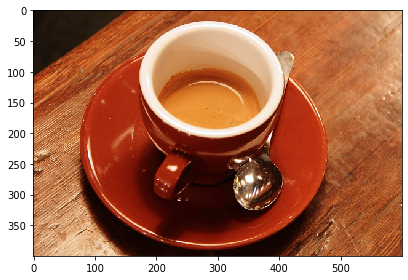

In [ ]:
# print
def print_pic(pic):
  io.imshow(pic)
  plt.show()

test_pic = data.coffee() # подгрузка тестового изображения из библиотеки
print_pic(test_pic)



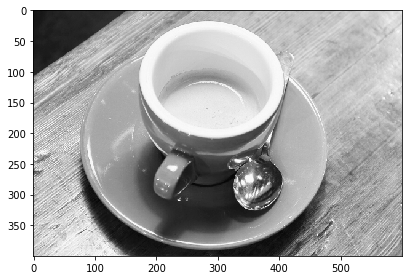

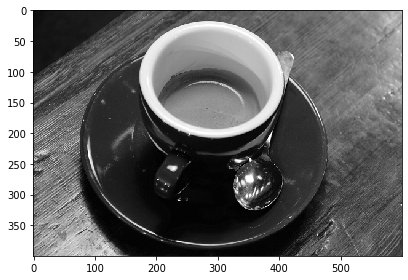

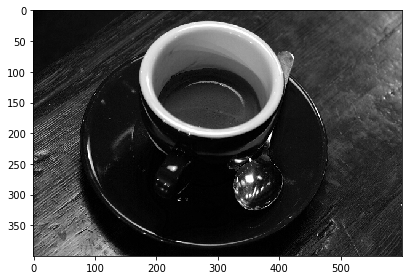

In [ ]:
# prit in greyscale
def print_layers_in_grey(pic):
  # bruh
  grayscale_channel_0 = pic.copy() 
  grayscale_channel_1 = pic.copy() 
  grayscale_channel_2 = pic.copy() 

  for i in range(len(pic)):
    for j in range(len(pic[i])): # bruh
      grayscale_channel_0[i][j] = [pic[i][j][0],pic[i][j][0],pic[i][j][0]]
      grayscale_channel_1[i][j] = [pic[i][j][1],pic[i][j][1],pic[i][j][1]]
      grayscale_channel_2[i][j] = [pic[i][j][2],pic[i][j][2],pic[i][j][2]]

  print_pic(grayscale_channel_0)
  print_pic(grayscale_channel_1)
  print_pic(grayscale_channel_2)

test_pic = data.coffee() # подгрузка тестового изображения из библиотеки
print_layers_in_grey(test_pic)


In [ ]:
def normalize_rgb_pic(pic):
  ret = copy_pic(pic) 
  for i in range(len(ret)):
    for j in range(len(ret)):
      ret[i][j][0] = 0 if ret[i][j][0]<0 else (ret[i][j][0] if ret[i][j][0] <255 else 255)
      ret[i][j][1] = 0 if ret[i][j][1]<0 else (ret[i][j][1] if ret[i][j][1] <255 else 255)
      ret[i][j][2] = 0 if ret[i][j][2]<0 else (ret[i][j][2] if ret[i][j][2] <255 else 255)
  return ret

[[[ 88   0 255]
  [ 88   0 255]
  [ 88   0 255]]

 [[ 88   0 255]
  [ 88   0 255]
  [ 88   0 255]]

 [[ 88   0 255]
  [ 88   0 255]
  [ 88   0 255]]]


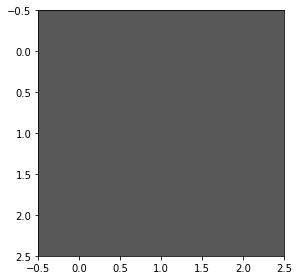

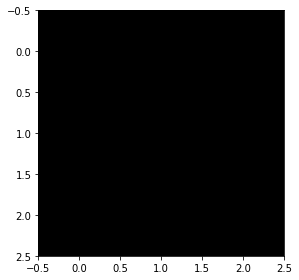

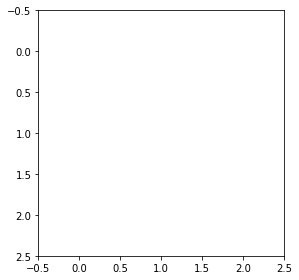

[[[88, -86, 300], [88, -86, 300], [88, -86, 300]], [[88, -86, 300], [88, -86, 300], [88, -86, 300]], [[88, -86, 300], [88, -86, 300], [88, -86, 300]]]


In [ ]:
def prepare2print_wiered_stuff(maybe_pic):
  return np.uint8(normalize_rgb_pic(maybe_pic)) 
tmp_maybe_pic = [[[88,-86, 300] for i in range(3)] for j in range(3)]
print(prepare2print_wiered_stuff(tmp_maybe_pic))
print_layers_in_grey(prepare2print_wiered_stuff(tmp_maybe_pic))
print(tmp_maybe_pic)

In [ ]:
from skimage.util import img_as_ubyte

================================

In [ ]:
def export_pic_data(maybe_pic):
  print(maybe_pic)
  print_layers_in_grey(prepare2print_wiered_stuff(maybe_pic))

[[[88, -86, 83], [88, -86, 83], [88, -86, 83]], [[88, -86, 83], [88, -86, 83], [88, -86, 83]], [[88, -86, 83], [88, -86, 83], [88, -86, 83]]]


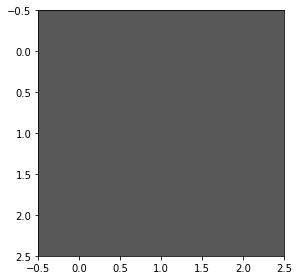

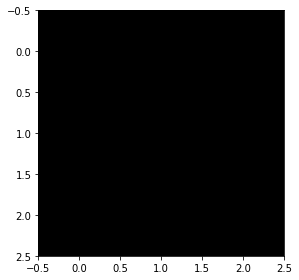

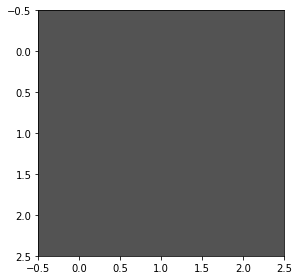

In [ ]:
# основной блок

# объявление изображения
# выбранный цвет
sel_color = [88, -86, 83]

pic_size = 3
# Задать цвет в координатах LAB
# Вывести изображения каналов пространства LAB
test_lab_pic = [[sel_color.copy() for i in range(pic_size)] for j in range(pic_size)]
export_pic_data(test_lab_pic)

[[[88.0, 119.52, 136.02], [88.0, 119.52, 136.02], [88.0, 119.52, 136.02]], [[88.0, 119.52, 136.02], [88.0, 119.52, 136.02], [88.0, 119.52, 136.02]], [[88.0, 119.52, 136.02], [88.0, 119.52, 136.02], [88.0, 119.52, 136.02]]]


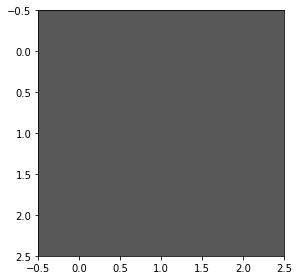

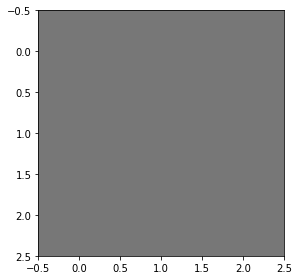

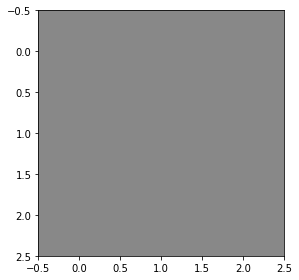

In [ ]:
# Преобразовать цвет заданный в п.1 в цветовое пространство LCH
# Вывести изображения каналов пространства LCH
test_lch_pic = change_pic(test_lab_pic, converter_lab2lch) 
export_pic_data(test_lch_pic)

[[[0, 258, 0], [0, 258, 0], [0, 258, 0]], [[0, 258, 0], [0, 258, 0], [0, 258, 0]], [[0, 258, 0], [0, 258, 0], [0, 258, 0]]]


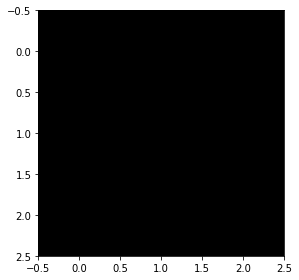

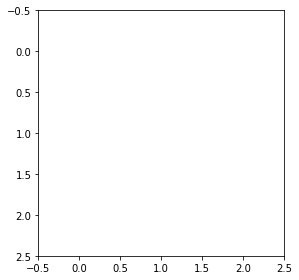

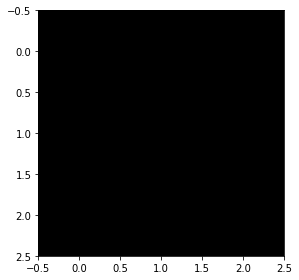

[[[0, 255, 0], [0, 255, 0], [0, 255, 0]], [[0, 255, 0], [0, 255, 0], [0, 255, 0]], [[0, 255, 0], [0, 255, 0], [0, 255, 0]]]


In [ ]:
# Преобразовать цвет заданный в п.1 в цветовое пространство RGB
# Вывести изображения каналов пространства RGB
test_rgb_pic = change_pic(test_lab_pic, converter_lab2rgb) 
export_pic_data(test_rgb_pic)
test_rgb_pic_normalized = normalize_rgb_pic(test_rgb_pic) # нужна ли обратная нормализация?
print(test_rgb_pic_normalized)

[[[120.0, 1.0, 255.0], [120.0, 1.0, 255.0], [120.0, 1.0, 255.0]], [[120.0, 1.0, 255.0], [120.0, 1.0, 255.0], [120.0, 1.0, 255.0]], [[120.0, 1.0, 255.0], [120.0, 1.0, 255.0], [120.0, 1.0, 255.0]]]


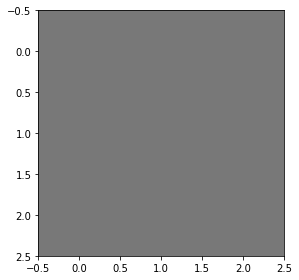

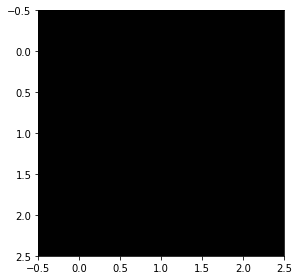

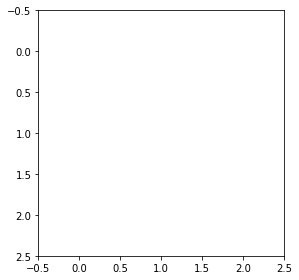

[[[120.0, -1.01, 127.5], [120.0, -1.01, 127.5], [120.0, -1.01, 127.5]], [[120.0, -1.01, 127.5], [120.0, -1.01, 127.5], [120.0, -1.01, 127.5]], [[120.0, -1.01, 127.5], [120.0, -1.01, 127.5], [120.0, -1.01, 127.5]]]


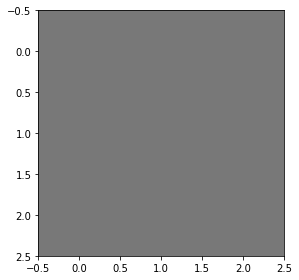

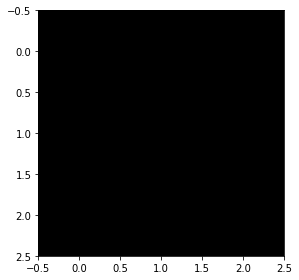

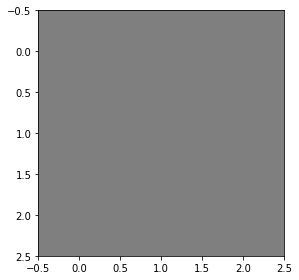

In [ ]:
# Преобразовать цвет, полученный в п. 5 в пространства HSV, HSL
# Вывести изображения каналов этих пространств

#test_hsl_pic = change_pic(test_rgb_pic, converter_rgb2hsl) 
test_hsv_pic = change_pic(test_rgb_pic_normalized, converter_rgb2hsv) 
export_pic_data(test_hsv_pic)

#test_hsl_pic = change_pic(test_rgb_pic, converter_rgb2hsl) 
test_hsl_pic = change_pic(test_rgb_pic_normalized, converter_rgb2hsl) 
export_pic_data(test_hsl_pic)

In [ ]:
# Осуществить обратное преобразование в LAB из всех полученных пространств в п. 3, 5, 7
test_lch2lab_pic = change_pic(test_lch_pic, converter_lch2lab) 
test_rgb2lab_pic = change_pic(test_rgb_pic, converter_rgb2lab) 
test_hsv2lab_pic = change_pic(test_hsv_pic, converter_hsv2lab) 
test_hsl2lab_pic = change_pic(test_hsl_pic, converter_hsl2lab) 



In [ ]:
print(test_lch2lab_pic)
print("")
print(test_rgb2lab_pic)
print("")
print(test_hsv2lab_pic)
print("")
print(test_hsl2lab_pic)
print("")

[[[88, -86, 83], [88, -86, 83], [88, -86, 83]], [[88, -86, 83], [88, -86, 83], [88, -86, 83]], [[88, -86, 83], [88, -86, 83], [88, -86, 83]]]

[[[88.66, -86.95, 83.92], [88.66, -86.95, 83.92], [88.66, -86.95, 83.92]], [[88.66, -86.95, 83.92], [88.66, -86.95, 83.92], [88.66, -86.95, 83.92]], [[88.66, -86.95, 83.92], [88.66, -86.95, 83.92], [88.66, -86.95, 83.92]]]

[[[99.73, 0.33, 0.11], [99.73, 0.33, 0.11], [99.73, 0.33, 0.11]], [[99.73, 0.33, 0.11], [99.73, 0.33, 0.11], [99.73, 0.33, 0.11]], [[99.73, 0.33, 0.11], [99.73, 0.33, 0.11], [99.73, 0.33, 0.11]]]

[[[53.5, -0.37, -0.14], [53.5, -0.37, -0.14], [53.5, -0.37, -0.14]], [[53.5, -0.37, -0.14], [53.5, -0.37, -0.14], [53.5, -0.37, -0.14]], [[53.5, -0.37, -0.14], [53.5, -0.37, -0.14], [53.5, -0.37, -0.14]]]



In [ ]:
from colormath.color_diff import *
delta_lab_labpic = LabColor(test_lab_pic[0][0][0],test_lab_pic[0][0][1],test_lab_pic[0][0][2])
delta_lab = LabColor(0,0,0)
print(delta_e_cie1976(delta_lab_labpic, delta_lab))

def print_delta(pic):
  delta_lab.lab_l = pic[0][0][0]
  delta_lab.lab_a = pic[0][0][1]
  delta_lab.lab_b = pic[0][0][2]

  print(round(delta_e_cmc(delta_lab_labpic, delta_lab),2))
  print(round(delta_e_cie1994(delta_lab_labpic, delta_lab),2))
  print(round(delta_e_cie2000(delta_lab_labpic, delta_lab),2))

148.42169652715873


In [ ]:
print("\nlch\n")
print_delta(test_lch2lab_pic)
print("\nrgb\n")
print_delta(test_rgb2lab_pic)
print("\nhsv\n")
print_delta(test_hsv2lab_pic)
print("\nhsl\n")
print_delta(test_hsl2lab_pic)


lch

0.0
0.0
0.0

rgb

0.43
0.69
0.47

hsv

33.52
22.41
33.8

hsl

35.29
39.32
41.84
